**Autor: Kaiky Rastelli de Lima**

#Configurações iniciais

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
from statsmodels.tools.tools import add_constant
sns.set_theme()#tema global dos gráficos
sns.set_palette('muted')#paleta global de cores
plt.rcParams['figure.dpi'] = 100#dpi global das figuras

#Importando dados

In [ ]:
dados = pd.read_excel('/content/Dataset_InternshipProject.xlsx')
dados

,Date,Feeder Cattle,Live Cattle,Corn,Wheat Chicago,Brent Crude,Heating Oil,Soybean,Soybean Meal,Soybean Oil,Sugar,Coffee,Cotton,Wheat Kansas,USDBRL,Gold
0,2023-12-05,214.300,168.625,490.25,620.75,77.31,263.39,1308.50,418.5,50.26,24.96,183.75,79.68,653.75,4.9256,2038.3000
1,2023-12-04,210.525,167.075,485.50,595.75,78.03,265.97,1306.25,408.3,51.24,25.81,179.40,78.68,656.25,4.9449,2042.2000
2,2023-12-01,214.425,169.275,484.75,577.00,78.88,266.15,1325.00,412.7,51.45,25.09,184.35,79.42,645.00,4.8828,2089.7000
3,2023-11-30,219.950,170.875,482.75,570.25,82.83,275.42,1342.75,424.0,52.26,26.04,184.70,80.06,643.25,4.9195,2057.2000
4,2023-11-29,222.200,171.900,475.75,556.00,83.10,280.87,1347.00,427.0,52.64,26.86,172.70,79.59,640.00,4.9060,2067.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2018-12-12,147.575,122.900,385.25,526.50,60.15,185.09,920.00,312.6,29.04,12.74,103.05,79.97,483.75,3.8531,1250.0000
1291,2018-12-11,147.300,122.150,384.75,521.00,60.20,184.71,915.00,310.9,28.96,12.83,102.35,80.02,477.25,3.9003,1247.2000
1292,2018-12-10,145.025,121.200,384.00,525.25,59.97,184.41,909.75,310.0,28.76,12.72,105.15,79.88,482.75,3.9229,1249.4000
1293,2018-12-07,144.375,117.900,385.50,531.25,61.67,188.62,916.75,311.2,28.74,12.87,104.10,80.23,484.50,3.9079,1252.6000


#Tratando os dados

In [ ]:
dados.info()#entendendo a estrutura dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1295 non-null   datetime64[ns]
 1   Feeder Cattle  1260 non-null   float64       
 2   Live Cattle    1260 non-null   float64       
 3   Corn           1260 non-null   float64       
 4   Wheat Chicago  1260 non-null   float64       
 5   Brent Crude    1292 non-null   float64       
 6   Heating Oil    1260 non-null   float64       
 7   Soybean        1260 non-null   float64       
 8   Soybean Meal   1260 non-null   float64       
 9   Soybean Oil    1260 non-null   float64       
 10  Sugar          1258 non-null   float64       
 11  Coffee         1258 non-null   float64       
 12  Cotton         1258 non-null   float64       
 13  Wheat Kansas   1260 non-null   float64       
 14  USDBRL         1252 non-null   float64       
 15  Gold           1260 n

In [ ]:
dados.isna().sum()#procurando por missing data para tratar nas análises

Date              0
Feeder Cattle    35
Live Cattle      35
Corn             35
Wheat Chicago    35
Brent Crude       3
Heating Oil      35
Soybean          35
Soybean Meal     35
Soybean Oil      35
Sugar            37
Coffee           37
Cotton           37
Wheat Kansas     35
USDBRL           43
Gold             35
dtype: int64

##Amostras de treino e validação

A amostra é separada em treino e validação para que se seja feito o cross-validation, garantindo resultados mais robustos e condizentes com a realidade. Esse método evita, principalmente, o problema de overfitting dos modelos.

In [ ]:
treino, teste = train_test_split(dados, test_size=0.5, shuffle = False)# Separa a amostra em treino e teste

treino = treino.dropna()
treino.index = treino['Date']
treino = treino.drop(axis = 1, columns = 'Date')#tratando a base de treino

teste = teste.dropna()
teste.index = teste['Date']
teste = teste.drop(axis = 1, columns = 'Date')#tratando a base de teste

Os dados faltantes aqui ocorrem por causa de dias em que não houve negociação dos ativos. Por isso, e por causa da quantidade de dados, não é necessário preecher esses dados, utilizando algum método arbitrário que, potencialmente, distorceria a distribuição da amostra.

Dessa forma, o ideal seria remover os dados faltantes após a seleção dos pares pelo teste de cointegração, assim removendo o mínimo de dados possível. Porém, a função do teste não trabalha com dados faltantes, por isso eles foram removidos agora no início.

#Análise gráfica preliminar

In [ ]:
dados.columns.drop('Date')#para usar nos subplots

Index(['Feeder Cattle', 'Live Cattle', 'Corn', 'Wheat Chicago', 'Brent Crude',
       'Heating Oil', 'Soybean', 'Soybean Meal', 'Soybean Oil', 'Sugar',
       'Coffee', 'Cotton', 'Wheat Kansas', 'USDBRL', 'Gold'],
      dtype='object')

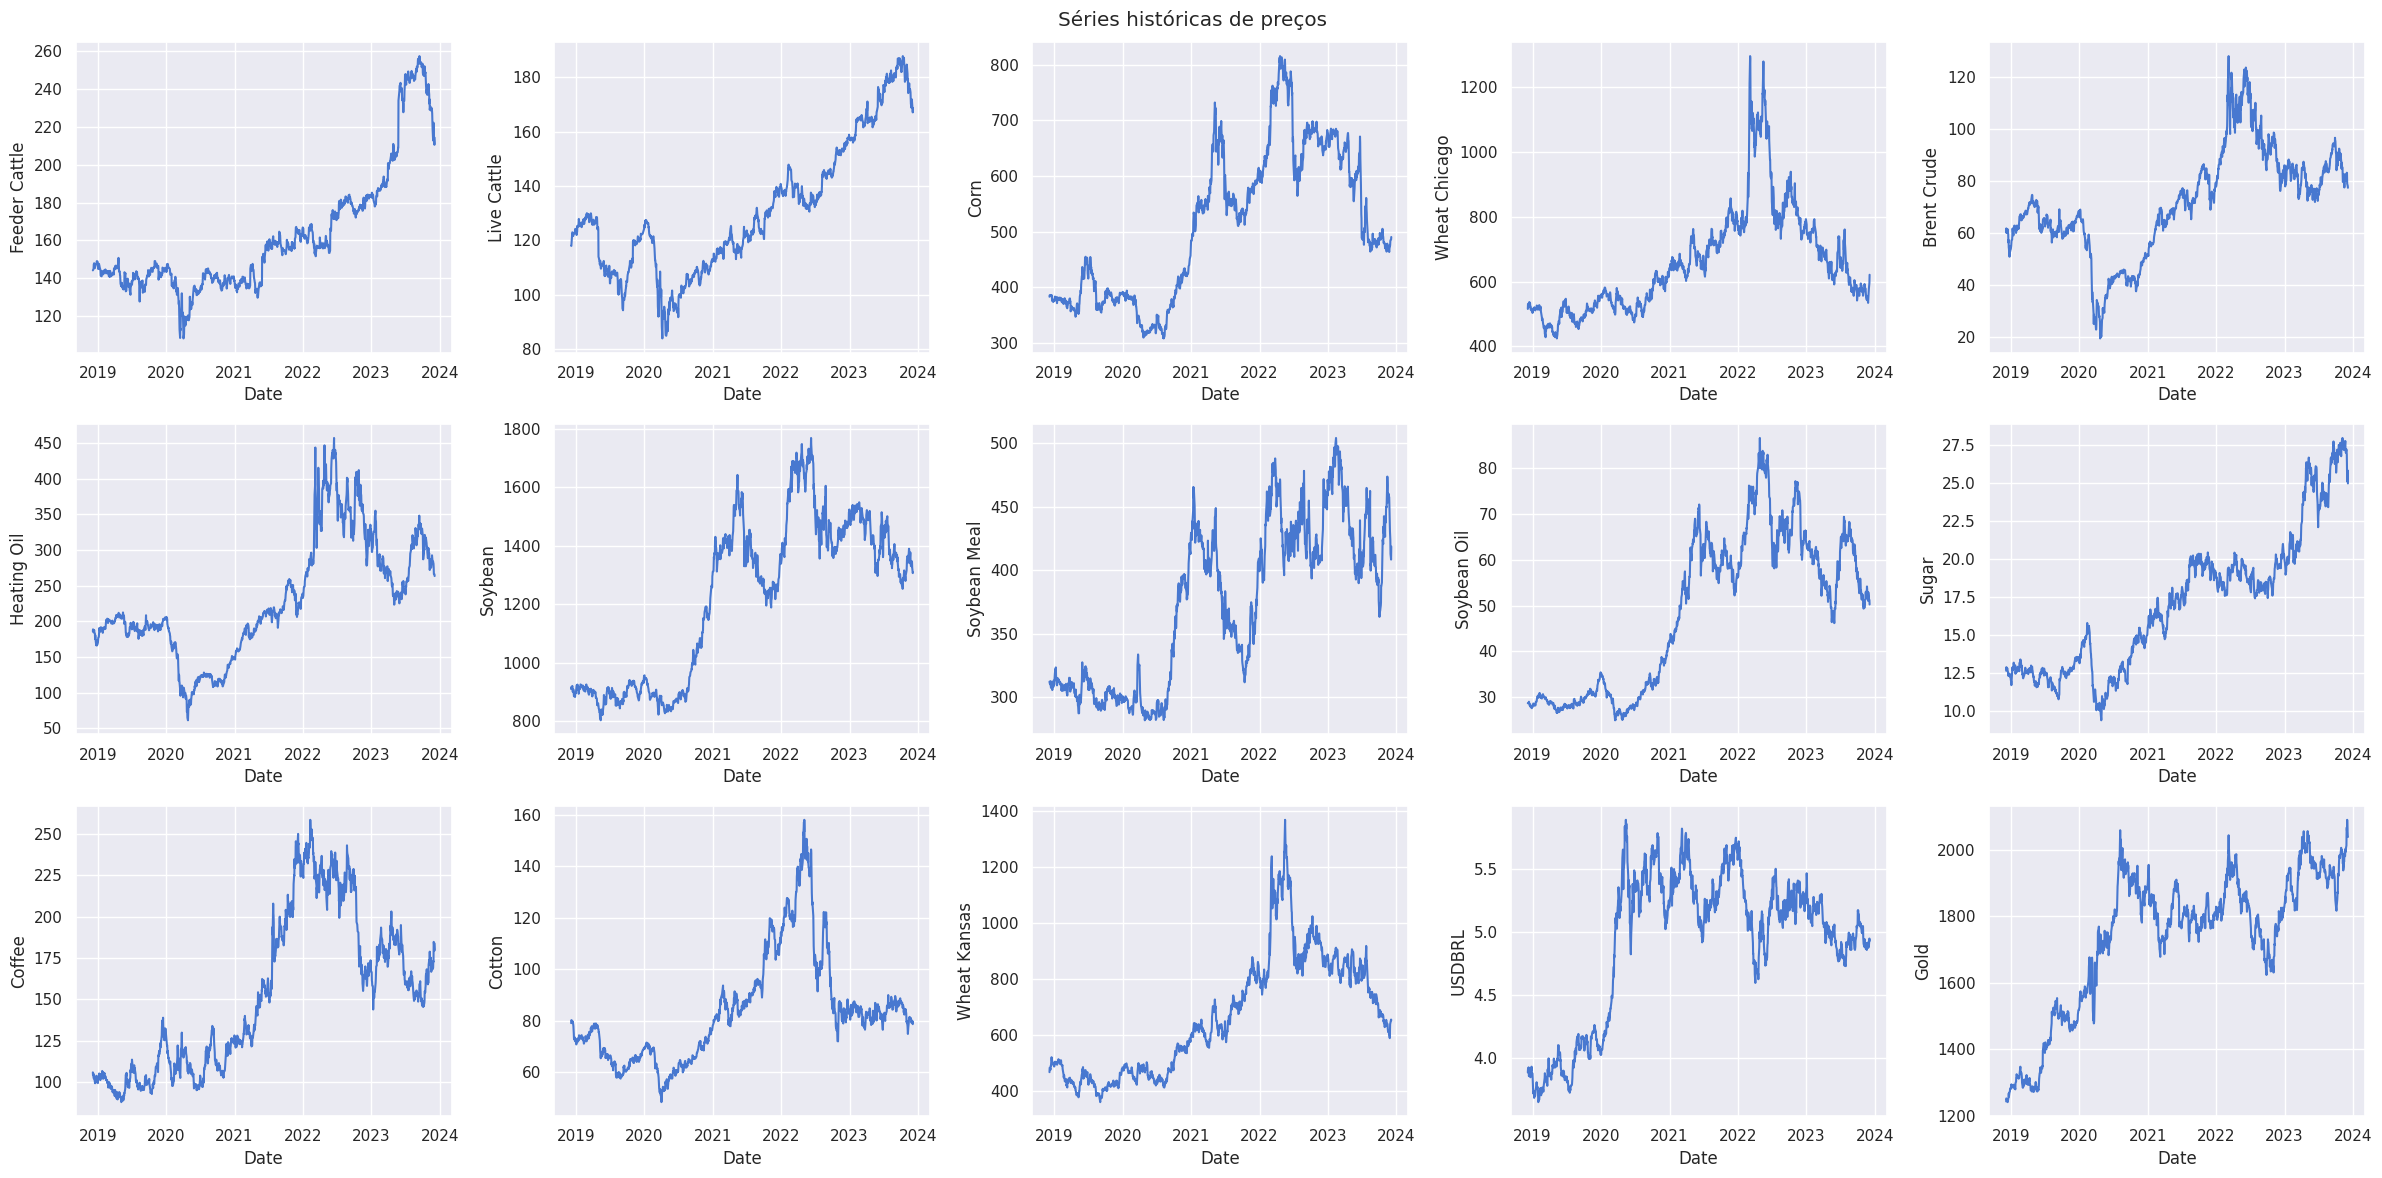

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (24,12))#cria a figura e os gráficos

sns.lineplot(x = 'Date', y = 'Feeder Cattle', data = dados, ax = axs[0][0])
sns.lineplot(x = 'Date', y = 'Live Cattle', data = dados, ax = axs[0][1])
sns.lineplot(x = 'Date', y = 'Corn', data = dados, ax = axs[0][2])
sns.lineplot(x = 'Date', y = 'Wheat Chicago', data = dados, ax = axs[0][3])
sns.lineplot(x = 'Date', y = 'Brent Crude', data = dados, ax = axs[0][4])
sns.lineplot(x = 'Date', y = 'Heating Oil', data = dados, ax = axs[1][0])
sns.lineplot(x = 'Date', y = 'Soybean', data = dados, ax = axs[1][1])
sns.lineplot(x = 'Date', y = 'Soybean Meal', data = dados, ax = axs[1][2])
sns.lineplot(x = 'Date', y = 'Soybean Oil', data = dados, ax = axs[1][3])
sns.lineplot(x = 'Date', y = 'Sugar', data = dados, ax = axs[1][4])
sns.lineplot(x = 'Date', y = 'Coffee', data = dados, ax = axs[2][0])
sns.lineplot(x = 'Date', y = 'Cotton', data = dados, ax = axs[2][1])
sns.lineplot(x = 'Date', y = 'Wheat Kansas', data = dados, ax = axs[2][2])
sns.lineplot(x = 'Date', y = 'USDBRL', data = dados, ax = axs[2][3])
sns.lineplot(x = 'Date', y = 'Gold', data = dados, ax = axs[2][4])

fig.suptitle('Séries históricas de preços')#título da figura toda
plt.tight_layout()#ajusta automaticamente os gráficos à figura (para previnir erros)
fig.show()

Uma análise gráfica inicial da série histórica de preços dos ativos, principalmente tentando identificar se há alguma anomalia nos preços em algum determinado período de tempo. Como é possível observar, não há nada muito fora do comum com os preços desses ativos. No período da pandemia do COVID-19, percebemos que houveram comportamentos diferentes entre os ativos devido à suas características idiossincráticas, como o ouro e dólar subindo muito seus patamares de preços por serem considerados reserva de valor.

#Estratégia: pairs trading com cointegração

A estratégia utilizada aqui será a estratégia de pairs trading baseada no processo de cointegração, que, intuitivamente, assume que o spread entre dois ativos é estacionário, ou seja, possui uma tendência de reversão à média.

Então, o trabalho consistirá em identificar pares de ativos que são cointegrados, calcular seu spread e seu z-score, obtendo os parâmetros para os sinais de entrada e saída do trade.

A tese que fundamenta a aplicação dessa estratégia é que os ativos são commodities, ou seja, são extremamente afetados pela estrutura de oferta e demanda global, obviamente cada um com suas especifidades. Se houverem pares de ativos com forte relação entre seus mercados, como por exemplo os dois tipos de trigo, gado é possível que eles sejam cointegrados, pois, desde que não ocorra uma mudança estrutural nas váriaveis que afetam seu preço (como oferta e demanda, tecnologia, leis), seu spread deveria se manter em uma banda seguindo um processo de reversão à média.

##Análise de correlações

As correlações, apesar possuírem uma caracterísca de mudar ao longo do tempo, funcionam como uma ferramenta de análise inicial. Essa análise ajudará a entender a relação básica entre os ativos e fundamentar a escolha dos pares de ativos.

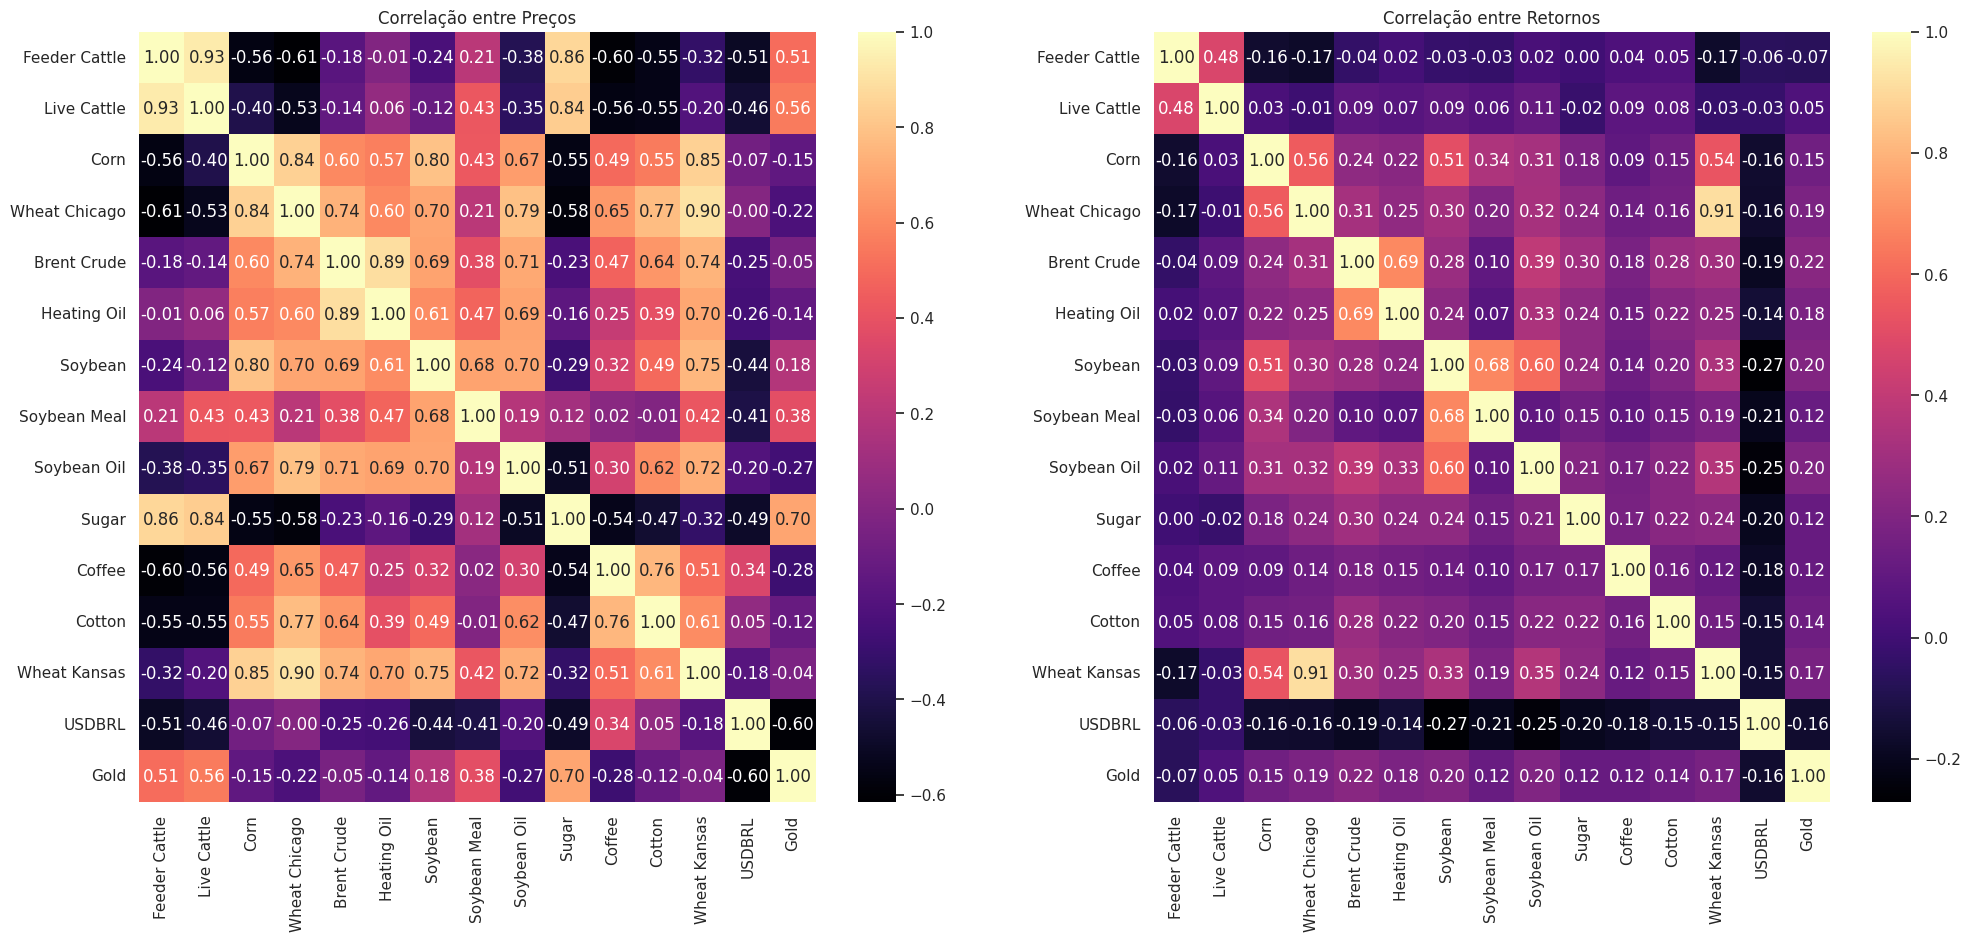

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24,10))
sns.heatmap(
            data = treino.corr(method ='pearson'), #heatmap da matriz de correlação
            ax = axs[0],
            cmap='magma',
            annot=True,
            fmt=".2f"
)

sns.heatmap(
            data = treino.pct_change().corr(method ='pearson'), #heatmap da matriz de correlação
            ax = axs[1],
            cmap='magma',
            annot=True,
            fmt=".2f"
)
axs[0].set_title('Correlação entre Preços')
axs[1].set_title('Correlação entre Retornos')
fig.show()

Como podemos ver, existem pares de ativos com fortes correlações positivas entre preços, como é o caso do Feeder e Live Cattle, Wheat Chigago e Kansas, Feeder Cattle e Sugar, por exemplo.

Porém, essa relação não se mantém quando olhamos para a correlação entre os retornos, o pode indicar que os choques nos preços dos ativos são mais isolados e específicos do mercado de cada ativo. Dito isso, alguns ativos ainda mantém correlações siginificativas entre seus retornos, como é o caso do Wheat Chicago e Kansas, Corn e Wheat Kansas, Brent Crude e Heating Oil, Soybean Meal e Soybean.

Essas correlações de preços são um indicativo de que podem haver pares cointegrados entre os ativos da base de dados e colaboram para fundamentar a escolha dos pares.

##Testando se há cointegração entre pares pelo teste de Engle & Granger (EG)

[('Wheat Chicago', 'Cotton'), ('USDBRL', 'Gold')]


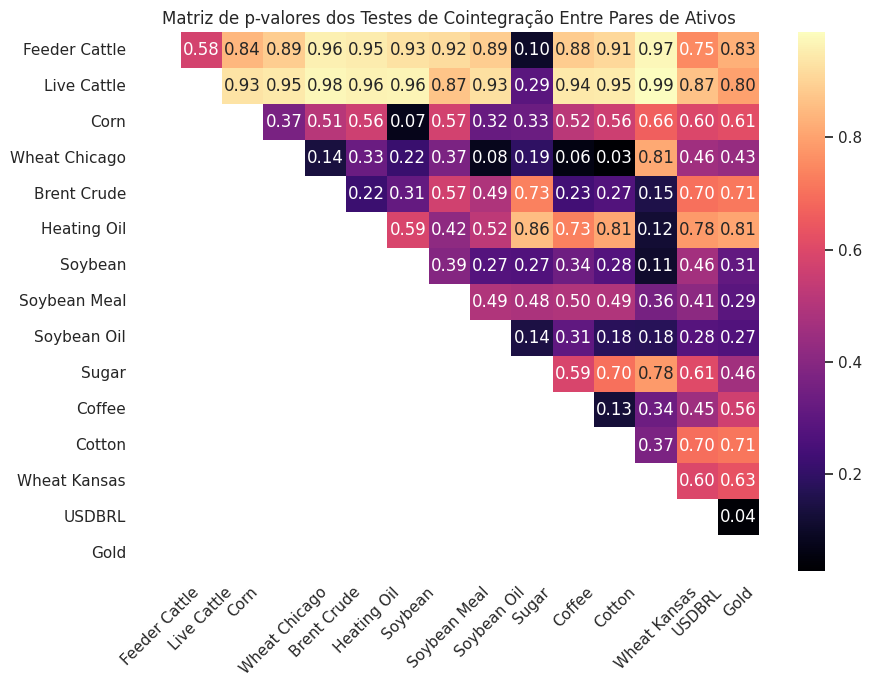

In [ ]:
# Função para achar pares cointegrados
def pares_cointegrados(dataframe):
    n = dataframe.shape[1]
    matriz_pvalor = np.ones((n, n))
    colunas = dataframe.columns
    pares = []
    for i in range(n):
        for j in range(i+1, n):
            resultado = coint(dataframe[colunas[i]], dataframe[colunas[j]])#roda o teste de cointegração para
                                                                           #cada par de ativo
            matriz_pvalor[i, j] = resultado[1]
            if resultado[1] < 0.05:
                pares.append((colunas[i], colunas[j]))#separa os pares que rejeitam a hipótese nula

    return matriz_pvalor, pares

# Aplicando a função e visualizando os p-valores
pvalores, pares = pares_cointegrados(treino)
print(pares)
with sns.axes_style("white"):#define um tema especifico para esse gráfico
  fig, ax = plt.subplots(figsize=(10,7))
  sns.heatmap(pvalores, #heatmap para visualizar os p-valores dos teste
              xticklabels = treino.columns,
              yticklabels = treino.columns,
              cmap = 'magma',
              annot = True,
              fmt=".2f",
              mask = (pvalores >= 0.99))
  plt.xticks(rotation=45)
  ax.set_title('Matriz de p-valores dos Testes de Cointegração Entre Pares de Ativos')

A função `coint()` da biblioteca stats models performa o teste EG para um par de ativos. Após realizar este teste para todos os pares de ativos percebemos que apenas dois pares de ativos possuem evidências à 95% de confiança de que existe cointegração. São eles Wheat Chicago e Cotton, USDBRL e Gold.

##Visualizando as séries de preços dos pares

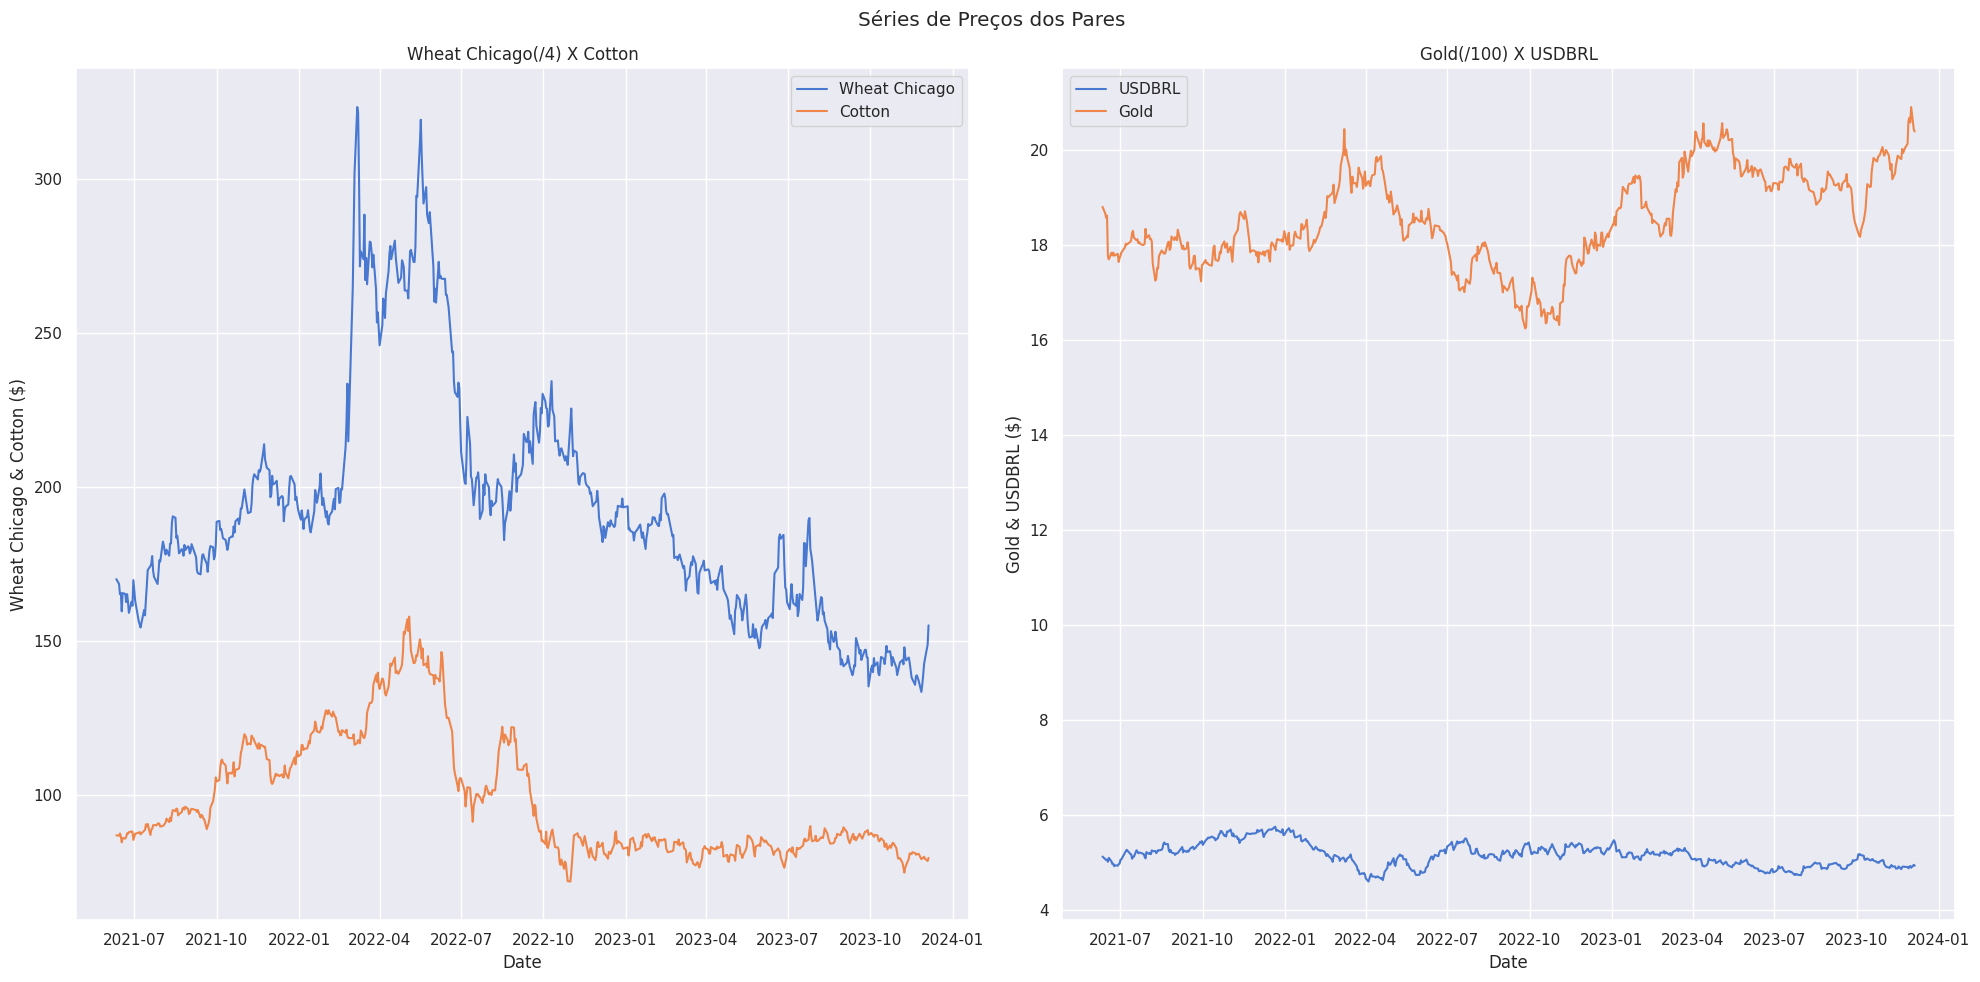

In [ ]:
#Plot dos pares de ativos
fig, axs = plt.subplots(figsize = (20, 10), nrows = 1, ncols = 2)#cria figura

sns.lineplot(x = 'Date', y = treino['Wheat Chicago']/4, data = treino, ax = axs[0], label = 'Wheat Chicago')
sns.lineplot(x = 'Date', y = 'Cotton', data = treino, ax = axs[0], label = 'Cotton')#plots
sns.lineplot(x = 'Date', y = 'USDBRL', data = treino, ax = axs[1], label = 'USDBRL')
sns.lineplot(x = 'Date', y = treino['Gold']/100, data = treino, ax = axs[1], label = 'Gold')

axs[0].set_title('Wheat Chicago(/4) X Cotton')#elementos adicionais
axs[0].set_ylabel('Wheat Chicago & Cotton ($)')
axs[0].legend(loc = 'upper right')

axs[1].set_title('Gold(/100) X USDBRL')
axs[1].set_ylabel('Gold & USDBRL ($)')
axs[1].legend(loc = 'upper left')

fig.suptitle('Séries de Preços dos Pares')#título da figura toda
plt.tight_layout()#ajusta automaticamente os gráficos à figura (para previnir erros)
fig.show()

*obs: os preços de alguns ativos foram reduzidos em escala para melhorar a visualização conjunta.*

Com esta análise podemos ver que o primeiro par é mais correlacionado que o segundo, o que é confirmado pela matriz de correlação feita anteriormente.

Apesar, dos dois pares serem cointegrados, pode ser que o primeiro possua resultado mais expressivo.

#Aplicando a estratégia

##Calculando o spread

Dentro da estratégia, o spread entre os pares de ativos será cointegrado e terá reversão à média e é com base nele que serão retirados o sinais para o pairs trading.

O spread será calculado da seguinte forma: (preço ativo 1) - b * (preço ativo 2). Em que b é o beta ou coeficiente angular de uma regressão linear simples dos ativos.

###Wheat Chicago e Cotton

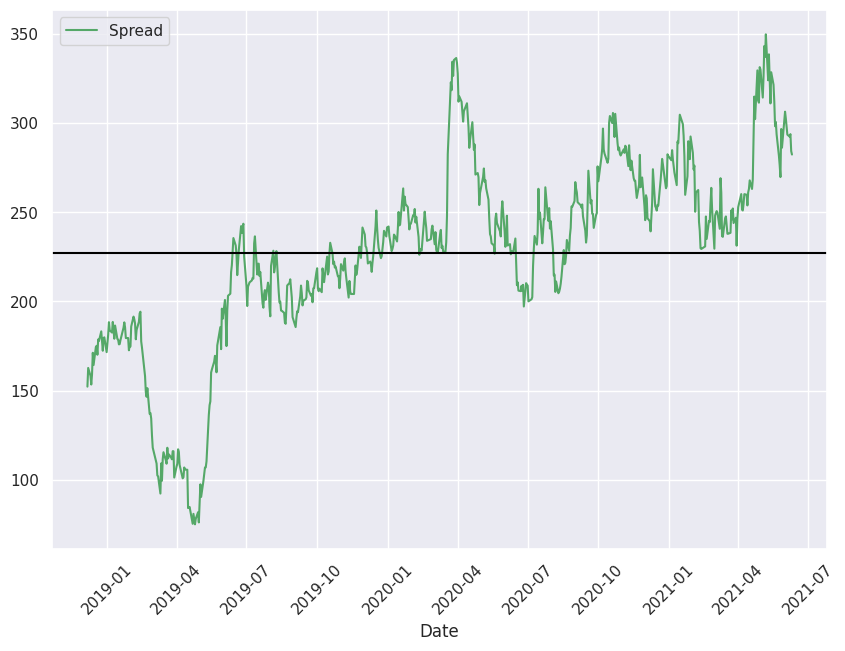

In [ ]:
#Calculando o spread
cotton = teste['Cotton']
cotton = add_constant(cotton)#adiciona coluna de constante para regressão
wheat = teste['Wheat Chicago']
ols1 = OLS(wheat, cotton).fit()#regressão por MQO para achar o beta
cotton = cotton['Cotton']
b1 = ols1.params['Cotton']

spread1 = wheat - b1 * cotton#calcula o spread

#plotando o spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread1, label = 'Spread', c = 'g')

plt.axhline(spread1.mean(), color='black')
plt.legend()
plt.xticks(rotation = 45)
fig.show()

###Gold e USDBRL

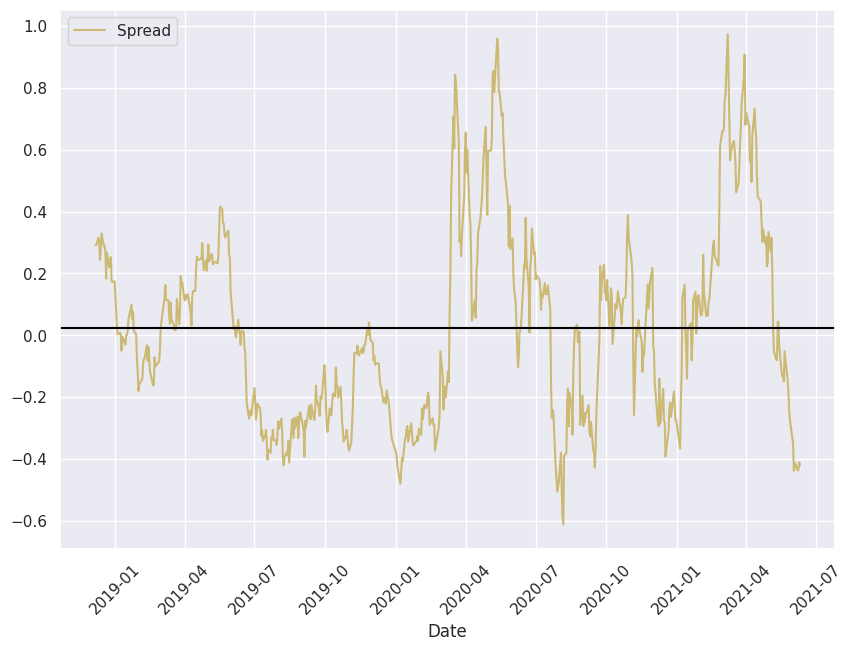

In [ ]:
#Calculando o spread
gold = teste['Gold']
gold = add_constant(gold)#adiciona coluna de constante para regressão
usdbrl = teste['USDBRL']
ols2 = OLS(usdbrl, gold).fit()#regressão por MQO para achar o beta
gold = gold['Gold']
b2 = ols2.params['Gold']

spread2 = usdbrl - b2 * gold#calcula o spread

#plotando o spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread2, label = 'Spread', c = 'y')

plt.axhline(spread2.mean(), color='black')
plt.legend()
plt.xticks(rotation = 45)
fig.show()

##Médias móveis

Para enriquecer a análise, é possível utilizar a ferramenta de médias móveis para descrever o spread normalizado, dessa forma temos um spread com menos ruídos e que captura melhor a dinâmica de preços do momento, não sendo contaminado por toda amostra.

###Wheat Chicago e Cotton

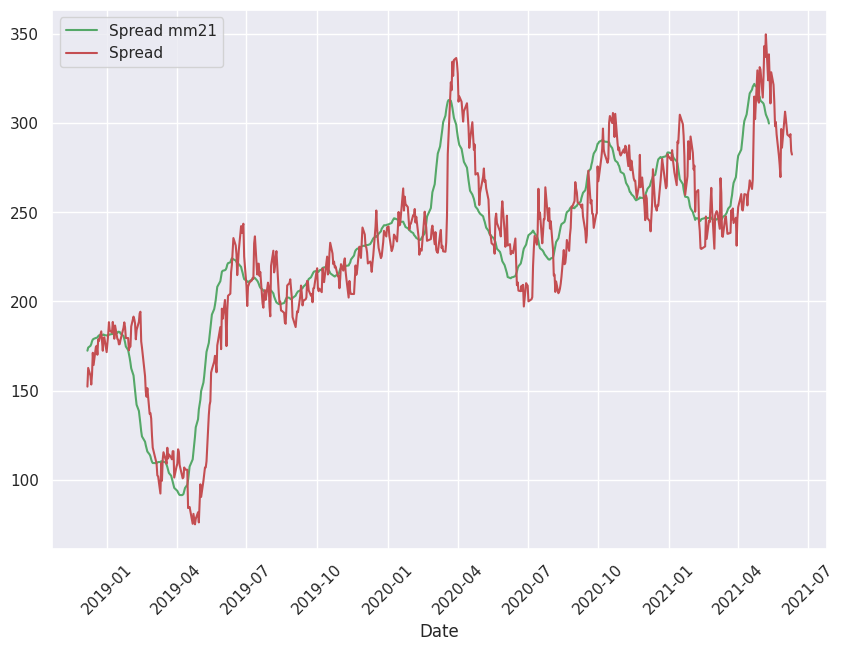

In [ ]:
# Média móvel de 21 dias
spread1_mm21 = spread1.rolling(21).mean()

#Visualizando a média móvel com o spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread1_mm21, label = 'Spread mm21', c = 'g')
sns.lineplot(data = spread1, label = 'Spread', c = 'r')

plt.legend()
plt.xticks(rotation = 45)
fig.show()

###Gold e USDBRL

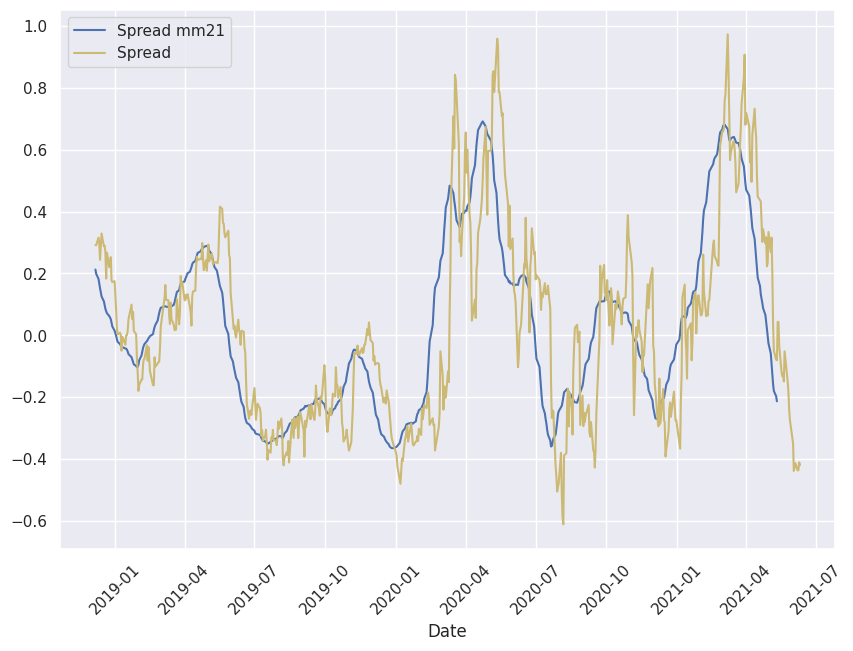

In [ ]:
# Média móvel de 21 dias
spread2_mm21 = spread2.rolling(21).mean()

#Visualizando a média móvel com o spread
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = spread2_mm21, label = 'Spread mm21', c = 'b')
sns.lineplot(data = spread2, label = 'Spread', c = 'y')

plt.legend()
plt.xticks(rotation = 45)
fig.show()

O janela escolhida foi de 21 dias, pois é o número médio de dias úteis em um mês. Como podemos ver, a média móvel de 21 dias suaviza o movimento do spread. Adicionalmente, ela fornecerá uma informação mais atualizada e limpa ao calcular o z-score do spread em comparação a utilizar a média da amostra inteira.

##Z-score

###Wheat Chicago e Cotton

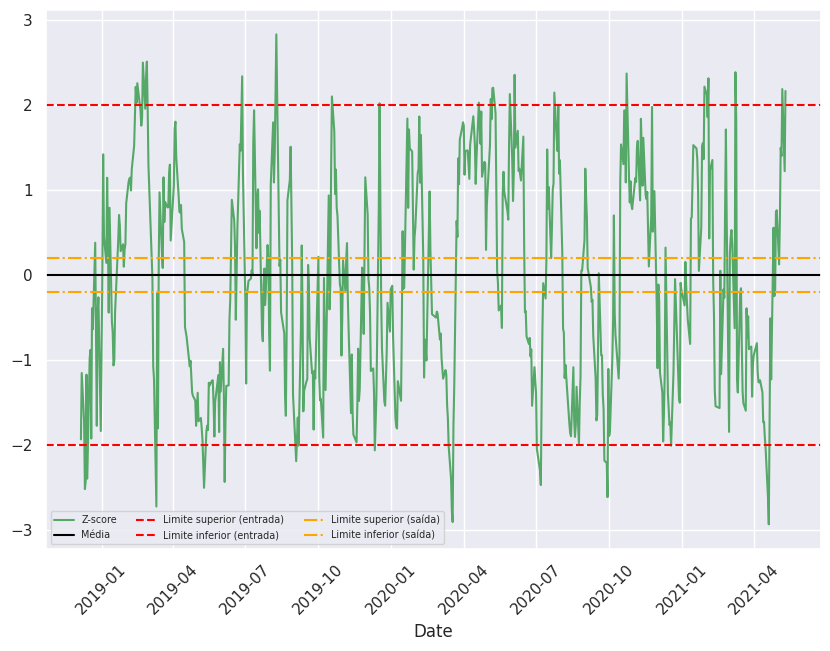

In [ ]:
# Desvio padrão móvel de 21 dias
std1_21 = spread1.rolling(21).std()

# Calculo do z-score para cada dia
zscore1_21 = (spread1 - spread1_mm21)/std1_21

#Visualizando o z-score e a estratégia para o par
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = zscore1_21, label = 'Z-score', c = 'g')

plt.axhline(0, color='black', label = 'Média')
plt.axhline(2.0, color='red', linestyle='--', label = 'Limite superior (entrada)')
plt.axhline(-2.0, color='red', linestyle='--', label = 'Limite inferior (entrada)')#banda de variação do spread
plt.axhline(0.2, color='orange', linestyle='-.', label = 'Limite superior (saída)')
plt.axhline(-0.2, color='orange', linestyle='-.', label = 'Limite inferior (saída)')

plt.legend(loc ='lower left', ncols = 3, fontsize = 'xx-small')
plt.xticks(rotation = 45)
fig.show()

###Gold e USDBRL

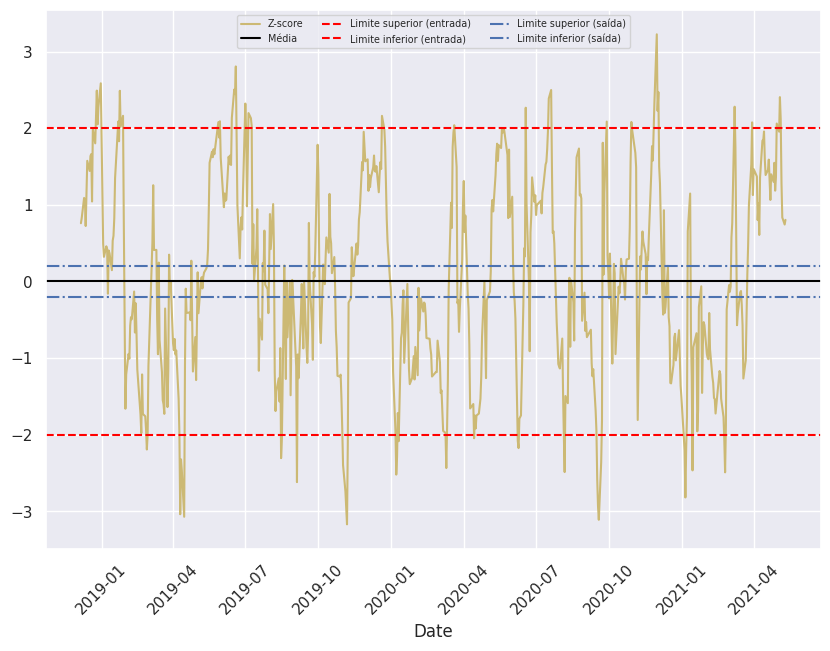

In [ ]:
# Desvio padrão móvel de 21 dias
std2_21 = spread2.rolling(21).std()

# Calculo do z-score para cada dia
zscore2_21 = (spread2 - spread2_mm21)/std2_21

#Visualizando o z-score para o par
fig, axs = plt.subplots(figsize = (10, 7))

sns.lineplot(data = zscore2_21, label = 'Z-score', c = 'y')

plt.axhline(0, color='black', label = 'Média')
plt.axhline(2.0, color='red', linestyle='--', label = 'Limite superior (entrada)')
plt.axhline(-2.0, color='red', linestyle='--', label = 'Limite inferior (entrada)')#banda de variação do spread
plt.axhline(0.2, color='b', linestyle='-.', label = 'Limite superior (saída)')
plt.axhline(-0.2, color='b', linestyle='-.', label = 'Limite inferior (saída)')

plt.legend(loc ='upper center', ncols = 3, fontsize = 'xx-small')
plt.xticks(rotation = 45)
fig.show()

##Trade

Com o z-score calculado e visualizado, é possível fazer o trade. Sabemos que o spread dos ativos é cointegrado e possuem uma tendência de reversão à média.

Dessa forma, quando o spread atingir valores considerados extremos, entraremos na estratégia long ou short a depender do sinal. Da seguinte forma:

*   Valor do spread maior que 2 (limite superior de entrada): short no spread, ou seja, short em Wheat Chicago e long Cotton (para o par 1) e short em USDBRL e long em Gold (para o par 2).
*   Valor do spread menor que -2 (limite inferior de entrada): long no spread, ou seja, long em Wheat Chicago e short Cotton (para o par 1) e long em USDBRL e short em Gold (para o par 2).

O sinal de saída do trade ocorre de forma similar. Após o momento que que se entrou na tese, quando o spread atingir um valor dentro da banda de saída, será o momento de realizar a posição. A razão disso é que valores nessa banda são perto o suficiente da média para que seja considerado que o movimento de reversão à média foi concluído. Como da seguinte forma:

*   Valor do spread entre 0,2 e -0,2 (limites superior e inferior de saída): realizar a posição.





Vale ressaltar que os valores das bandas são arbitrários e devem ser otimizados de acordo com os ativos específicos. Os valores de entrada escolhidos aqui são com base na hipótese que o spread segue uma distribuição normal, assim os 2 desvios padrão de distância da média representam a maior parte dos valores que deveriam vir daquela distribuição, ou seja, valores fora dessa banda são considerados extremos e indicam o início de um processo de reversão à média. Os limites de saída foram definidos como 10% dos limites de entrada, arbitrariamente.

Vale ressaltar que as bandas possuem um efeito de quantidade de trades e, consequentemente, aumento no custo de transação, pois quanto menores as bandas de entrada e maiores as bandas de saída, maior quantidade de trades feitos. O modelo aqui não incluí custos de transação, mas em situações reais eles devem ser implementados.

#Referências

*   https://www.quantrocket.com/code/?repo=quant-finance-lectures&path=%2Fcodeload%2Fquant-finance-lectures%2Fquant_finance_lectures%2FLecture42-Introduction-to-Pairs-Trading.ipynb.html
*   https://medium.com/analytics-vidhya/statistical-arbitrage-with-pairs-trading-and-backtesting-ec657b25a368
*   https://wilsonfreitas.github.io/estrategias-de-trading/pdf/cointegration-tests.pdf

*   https://quantbrasil.com.br/aprenda-a-estrategia-de-long-and-short-por-cointegracao/

*   https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/02-Moving-Average-and-ARMA-Models.html#:~:text=from%20statsmodels.tsa.arima_process%20import%20ArmaProcess%20%23%20build%20a%20list,AR_object.generate_sample%28nsample%3D5000%29%20%23%20Plot%20the%20ACF%20plot_acf%28simulated_data%2C%20lags%3D30%29%3B%20plt.savefig%28%27..%2Fimages%2Farma_acf.png%27%29

*   https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing/
*   https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html


*   https://www.statsmodels.org/devel/generated/statsmodels.tools.tools.add_constant.html


*   https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html


*   https://seaborn.pydata.org/tutorial/aesthetics.html

*   https://seaborn.pydata.org/tutorial/color_palettes.html
*   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots





